# Ben_Gambash

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set_style('darkgrid')

In [2]:
try:
    data = pd.read_csv("College_Data.csv")
except:
    print("All not ok thanks!")

In [3]:
df = data
df = df.set_index(df.columns[0])
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
#1 
print('The range of values :',df['Enroll'].max()-df['Enroll'].min())

The range of values : 6357


In [5]:
#2
print('The 75% percentile :',np.percentile(df['Books'],75))

The 75% percentile : 600.0


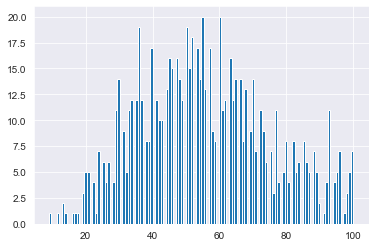

In [6]:
#3
plt.hist(data.Top25perc,120)
plt.show()

In [7]:
#4
##בהתפלגות נורמלית אנו יכולים לחלק את הדאטה לפי סטיית התקן כך שסטיית תקן אחת מהממוצע לצד החיובי והשלישי מכסה 68% מהערכים שני ציוני תקן 95% מהרכים  ו3 ציוני תקן 99% מהערכים  
df['Apps']


Unnamed: 0
Abilene Christian University       1660
Adelphi University                 2186
Adrian College                     1428
Agnes Scott College                 417
Alaska Pacific University           193
                                  ...  
Worcester State College            2197
Xavier University                  1959
Xavier University of Louisiana     2097
Yale University                   10705
York College of Pennsylvania       2989
Name: Apps, Length: 777, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


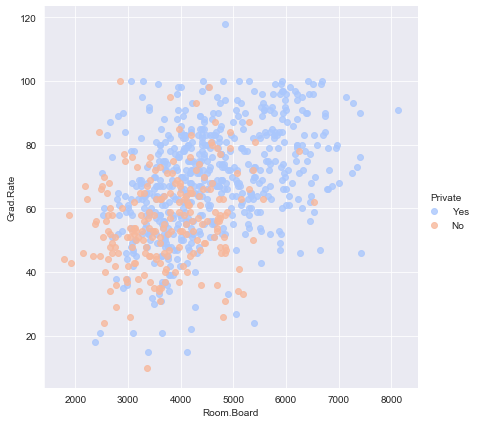

In [8]:
#lmplot1
sns.lmplot('Room.Board','Grad.Rate',data=df,fit_reg=False,hue='Private',palette='coolwarm',size=6,aspect=1)
plt.show()

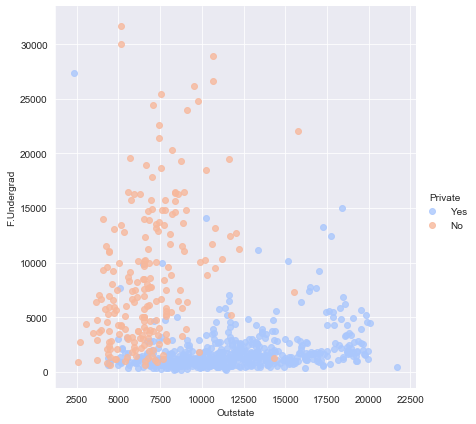

In [9]:
#lmplot2
sns.lmplot('Outstate','F.Undergrad',data=df,fit_reg=False,hue='Private',palette='coolwarm',size=6,aspect=1)
plt.show()

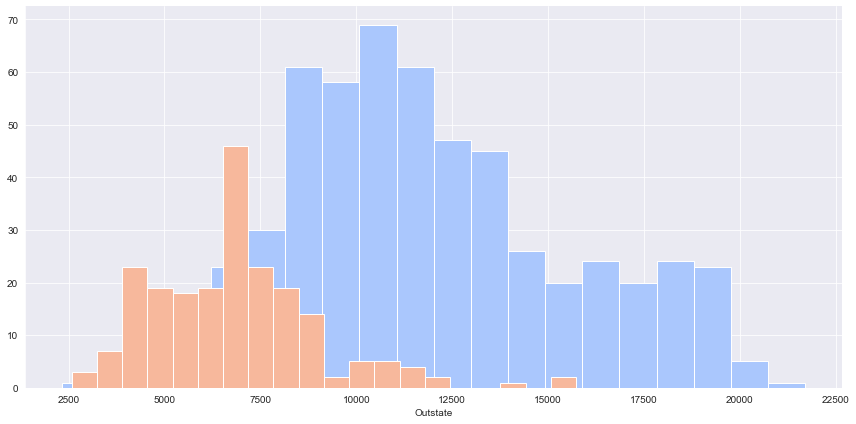

In [10]:
#FacetGrid1
sns.FacetGrid(data=df,hue='Private',palette='coolwarm',height=6,aspect=2).map(plt.hist,'Outstate',bins=20)
plt.show()

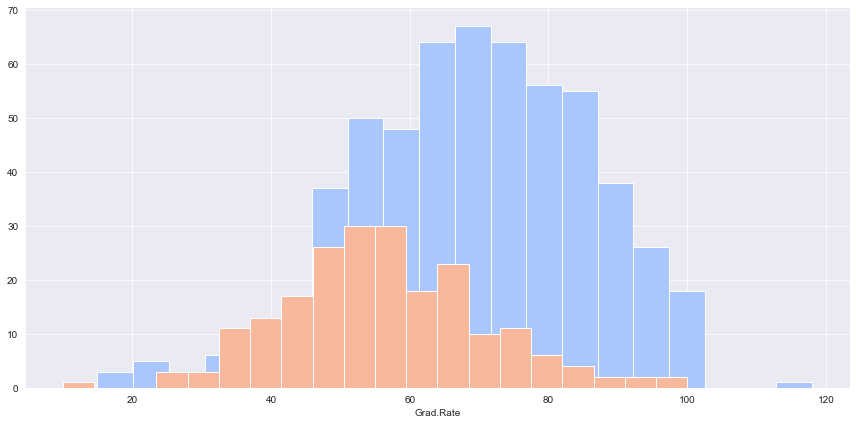

In [11]:
#FacetGrid2
sns.FacetGrid(data=df,hue='Private',palette='coolwarm',height=6,aspect=2).map(plt.hist,'Grad.Rate',bins=20)
plt.show()

In [12]:
##הסבר על גרף 4 ועל פאקטגרייד מה הבעיה ואיזה נתונים להוריד ולשנות ערכים

In [13]:
d = {'No' :0, 'Yes' :1}
df['Private'] = df['Private'].map(d)

In [14]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [15]:
##נוותר על תכונות על מנת לייעל את התהליך, אם יש תכונות שמתנהגות אותו דבר אפשר לוותר על אחת מהן

In [16]:
data_Not_Private = df.drop('Private',axis=1)

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in data_Not_Private.columns:
    print(i)
    new_data = data_Not_Private.drop(i,axis=1)
    X_train,X_test,y_train,y_test = train_test_split(new_data,
                                                data_Not_Private[i],
                                                test_size=0.3,
                                                random_state=204440705)
    regressor = DecisionTreeRegressor(random_state=204440705)
    regressor.fit(X_train,y_train)
    pred = regressor.predict(X_test) 
    score = r2_score(y_test,pred)
    print("r^2 score is ",score)                   
    

Apps
r^2 score is  0.8867050464509159
Accept
r^2 score is  0.6990649242315112
Enroll
r^2 score is  0.8790438513356389
Top10perc
r^2 score is  0.7666455180999809
Top25perc
r^2 score is  0.63270892632155
F.Undergrad
r^2 score is  0.8903376957715827
P.Undergrad
r^2 score is  0.3311994266916817
Outstate
r^2 score is  0.5162603707473782
Room.Board
r^2 score is  0.09530253814191025
Books
r^2 score is  -0.3084470212555581
Personal
r^2 score is  -0.8160634623597469
PhD
r^2 score is  0.5672719378630671
Terminal
r^2 score is  0.5333693091966454
S.F.Ratio
r^2 score is  0.2730340293380128
perc.alumni
r^2 score is  -0.31943421574393205
Expend
r^2 score is  0.4758405829790858
Grad.Rate
r^2 score is  -0.221812847542046


In [18]:
#קיים מתאם בין חלק מהפיצ'רים אך לא מספיק כדי להוריד עמודות

In [19]:
data_Not_Private

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


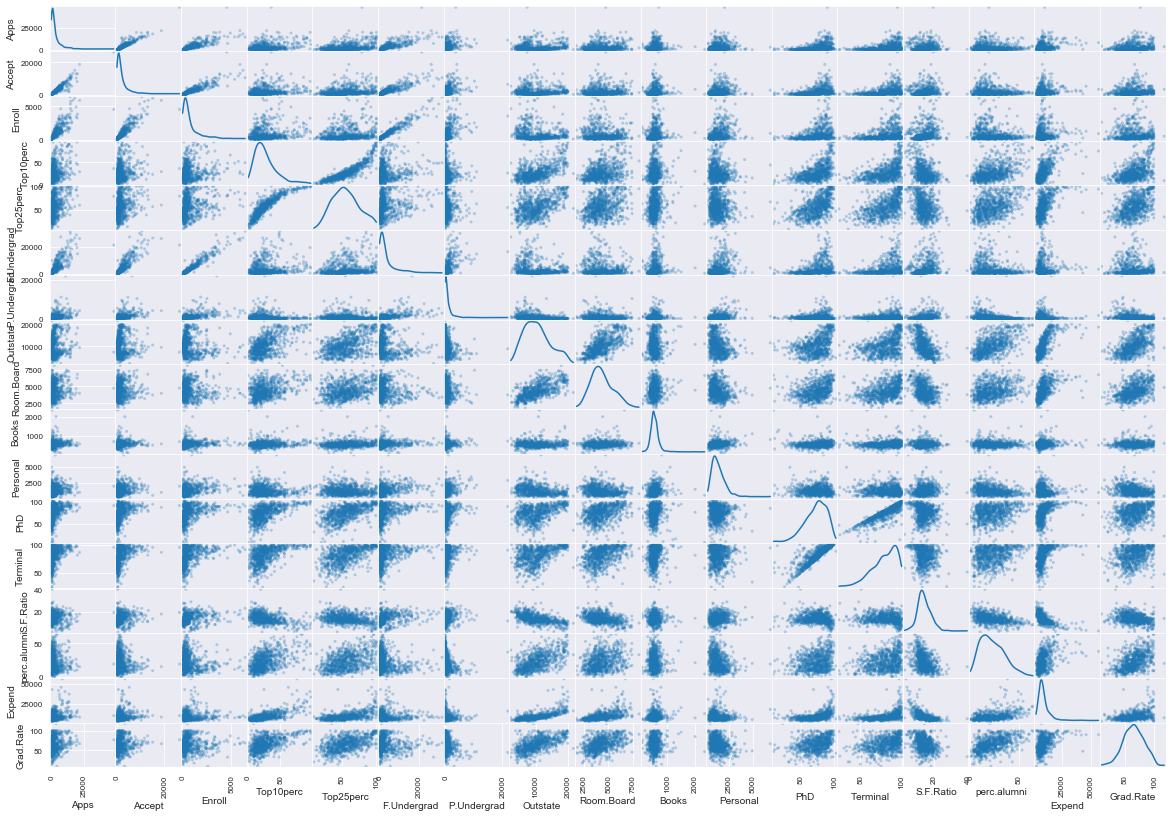

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_Not_Private,alpha=0.3,figsize=(20,14),diagonal='kde')
plt.show()

In [21]:
##ניתן לראות גם התפלגות נורמלית
##ישנם קשרים לדוגמא phdלterminal ובנוסף בין enrollלf.undergrad ובין undergrad

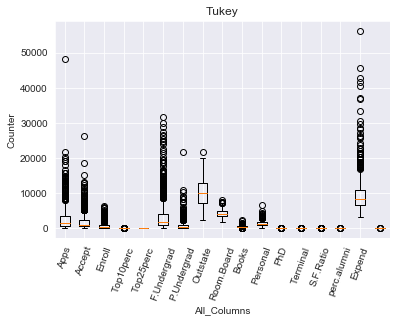

In [22]:
plt.boxplot([df['Apps'],
            df['Accept'],
            df['Enroll'],
            df['Top10perc'],
            df['Top25perc'],
            df['F.Undergrad'],
            df['P.Undergrad'],
            df['Outstate'],
            df['Room.Board'],
            df['Books'],
            df['Personal'],
            df['PhD'],
            df['Terminal'],
            df['S.F.Ratio'],
            df['perc.alumni'],
            df['Expend'],
            df['Grad.Rate']])
plt.xticks(range(1,len(data_Not_Private.columns)),data_Not_Private.columns,rotation=70)
plt.xlabel('All_Columns')
plt.ylabel('Counter')
plt.title('Tukey')
plt.show()

In [23]:
#look at the many outliers in Apps & F.Undergrad & Expend & P.Undergrad

In [24]:
new_data = df.loc[['New York University','University of California at Berkeley','Yale University','Manchester College']]

In [25]:
display(new_data)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
New York University,1,13594,7244,2505,70,86,12408,2814,17748,7262,450,1000,87,98,7.8,16,21227,71
University of California at Berkeley,0,19873,8252,3215,95,100,19532,2061,11648,6246,636,1933,93,97,15.8,10,13919,78
Yale University,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
Manchester College,1,1004,802,239,23,63,909,51,10440,3850,525,1450,63,72,11.8,20,7940,64


In [27]:
new_data = new_data.rank(pct=True)*100
new_data

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
New York University,75.0,75.0,75.0,75.0,50.0,50.0,75.0,100.0,75.0,100.0,25.0,25.0,50.0,100.0,50.0,50.0,75.0,50.0
University of California at Berkeley,25.0,100.0,100.0,100.0,87.5,100.0,100.0,75.0,50.0,50.0,100.0,75.0,75.0,75.0,100.0,25.0,50.0,75.0
Yale University,75.0,50.0,50.0,50.0,87.5,75.0,50.0,50.0,100.0,75.0,75.0,100.0,100.0,50.0,25.0,100.0,100.0,100.0
Manchester College,75.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,50.0,50.0,25.0,25.0,75.0,75.0,25.0,25.0


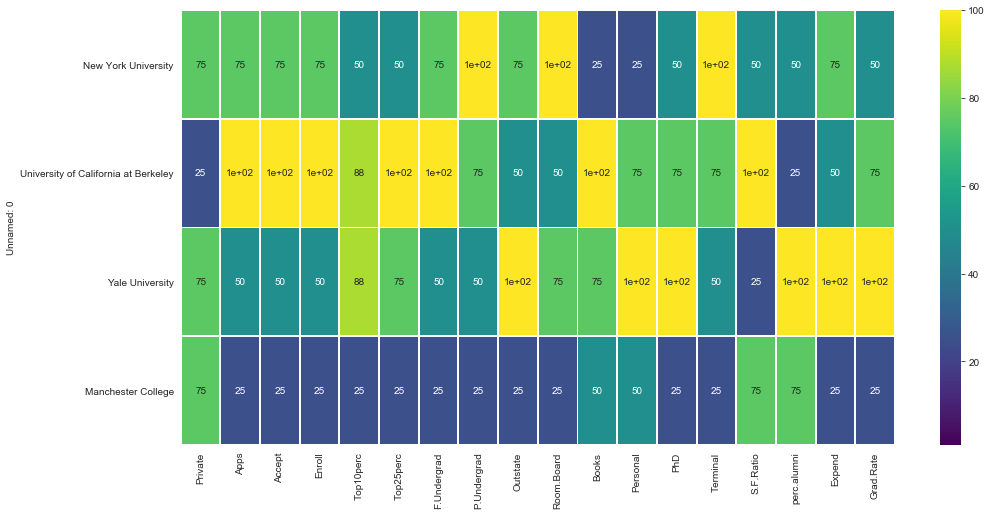

In [28]:
plt.figure(figsize = (16,8))
display(sns.heatmap(data=new_data,vmin=1,vmax=100,cmap='viridis',linecolor='white',annot=True,linewidths=1,yticklabels=True))
plt.show()

In [29]:
##appen explain heat map

In [30]:
##the outliers 
df1 = df.drop('Private',axis=1)
df1.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [31]:
all_outliers = np.array([],dtype='object')
for feature in df1.keys():
    Q1 = np.percentile(df1[feature],25)
    Q3 = np.percentile(df1[feature],75)
    IQR = Q3-Q1
    step = 1.5*IQR    
    print("Following are outliers of ",feature,":")
    outlier_pts = df1[~((df1[feature] >= Q1-step) & 
                             (df1[feature] <= Q3+step)) ]
    all_outliers=np.append(all_outliers,
                           outlier_pts.index.values.astype('object'))
    display(outlier_pts)
print("len of all_outliers: ",len(all_outliers))
print("all_outliers: ",all_outliers)
print(" ")
all_outliers2,indices = np.unique(all_outliers,return_inverse=True)
print("len of all_outliers2: ",len(all_outliers2))
print("all_outliers2: ",all_outliers2)
print(" ")
print("len of indices: ",len(indices))
print("indices: ",indices)

Following are outliers of  Apps :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Arizona State University Main campus,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48
Boston University,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72
Bowling Green State University,9251,7333,3076,14,45,13699,1213,7452,3352,600,1700,81,89,21.1,14,6918,67
Brown University,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97
Carnegie Mellon University,8728,5201,1191,60,89,4265,291,17900,5690,450,1250,86,93,9.2,31,24386,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
University of Washington,12749,7025,3343,40,81,20356,4582,8199,4218,708,2172,96,94,9.0,10,16527,65
University of Wisconsin at Madison,14901,10932,4631,36,80,23945,2200,9096,4290,535,1545,93,96,11.5,20,11006,72
Virginia Tech,15712,11719,4277,29,53,18511,604,10260,3176,740,2200,85,89,13.8,20,8944,73


Following are outliers of  Accept :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Arizona State University Main campus,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48
Auburn University-Main Campus,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69
Baylor University,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.5,38,7503,72
Boston University,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72
Bowling Green State University,9251,7333,3076,14,45,13699,1213,7452,3352,600,1700,81,89,21.1,14,6918,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villanova University,7759,5588,1477,30,68,6362,1292,15925,6507,400,300,89,90,13.4,24,10458,96
Virginia Tech,15712,11719,4277,29,53,18511,604,10260,3176,740,2200,85,89,13.8,20,8944,73
Washington State University,6540,5839,2440,31,70,14445,1344,8200,4210,800,2719,84,87,16.9,30,10912,56


Following are outliers of  Enroll :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Appalachian State University,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70
Arizona State University Main campus,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48
Auburn University-Main Campus,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69
Baylor University,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.5,38,7503,72
Boston University,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
University of Wisconsin at Madison,14901,10932,4631,36,80,23945,2200,9096,4290,535,1545,93,96,11.5,20,11006,72
University of Wisconsin at Milwaukee,5244,3782,1930,12,37,11561,7443,8786,2964,570,1980,79,87,15.9,8,8094,38
Virginia Tech,15712,11719,4277,29,53,18511,604,10260,3176,740,2200,85,89,13.8,20,8944,73


Following are outliers of  Top10perc :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Amherst College,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
Birmingham-Southern College,805,588,287,67,88,1376,207,11660,4325,400,900,74,79,14.0,34,8649,72
Bowdoin College,3356,1019,418,76,100,1490,8,19030,5885,1495,875,93,96,11.2,52,20447,96
Brown University,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97
Bryn Mawr College,1465,810,313,71,95,1088,16,18165,6750,500,1200,100,100,12.3,49,17449,89
Carleton College,2694,1579,489,75,93,1870,12,19292,3957,550,550,81,93,10.4,60,17960,91
Case Western Reserve University,3877,3156,713,71,93,3051,513,15700,4730,525,1460,95,95,2.9,29,19733,67
Claremont McKenna College,1860,767,227,71,93,887,1,17000,6010,500,850,99,99,9.6,52,18443,87
College of the Holy Cross,2994,1691,659,70,95,2675,22,18000,6300,400,900,92,96,11.3,55,12138,95


Following are outliers of  Top25perc :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,


Following are outliers of  F.Undergrad :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Appalachian State University,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70
Arizona State University Main campus,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48
Auburn University-Main Campus,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69
Baylor University,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.5,38,7503,72
Boston University,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia Commonwealth University,4963,3497,1567,18,45,10262,5065,10217,4182,500,3630,81,87,8.7,11,11183,45
Virginia Tech,15712,11719,4277,29,53,18511,604,10260,3176,740,2200,85,89,13.8,20,8944,73
Washington State University,6540,5839,2440,31,70,14445,1344,8200,4210,800,2719,84,87,16.9,30,10912,56


Following are outliers of  P.Undergrad :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Arizona State University Main campus,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48
Barry University,990,784,279,18,45,1811,3144,11290,5360,600,1800,76,78,12.6,11,9084,72
Boston University,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72
Central Connecticut State University,4158,2532,902,6,24,6394,3881,5962,4444,500,985,69,73,16.7,4,4900,49
Columbia College MO,314,158,132,10,28,690,5346,8294,3700,400,900,87,87,15.3,2,5015,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
University of Washington,12749,7025,3343,40,81,20356,4582,8199,4218,708,2172,96,94,9.0,10,16527,65
University of West Florida,1558,1254,472,20,57,3754,2477,6172,3994,541,1387,83,87,23.4,12,8488,53
University of Wisconsin at Milwaukee,5244,3782,1930,12,37,11561,7443,8786,2964,570,1980,79,87,15.9,8,8094,38


Following are outliers of  Outstate :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Bennington College,519,327,114,25,53,457,2,21700,4100,600,500,35,59,10.1,33,16364,55


Following are outliers of  Room.Board :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Barnard College,2496,1402,531,53,95,2121,69,17926,8124,600,850,83,93,10.3,33,12580,91
Mary Baldwin College,499,441,199,26,52,846,377,11200,7400,600,1300,66,79,6.8,50,10819,90
New York University,13594,7244,2505,70,86,12408,2814,17748,7262,450,1000,87,98,7.8,16,21227,71
North Central College,1127,884,308,30,64,1310,766,11718,7398,450,1800,73,87,16.4,33,8871,76
Northeastern University,11901,8492,2517,16,42,11160,10221,13380,7425,600,1750,73,82,12.9,17,9563,46
Scripps College,855,632,139,60,83,569,7,17238,7350,600,800,95,100,8.2,41,18372,73
University of Pennsylvania,12394,5232,2464,85,100,9205,531,17020,7270,500,1544,95,96,6.3,38,25765,93


Following are outliers of  Books :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Andrews University,1130,704,322,14,23,1586,326,9996,3090,900,1320,62,66,11.5,18,10908,46
Appalachian State University,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70
Baldwin-Wallace College,1690,1366,662,30,61,2718,1460,10995,4410,1000,1000,68,74,17.6,20,8086,85
Bowdoin College,3356,1019,418,76,100,1490,8,19030,5885,1495,875,93,96,11.2,52,20447,96
Bradley University,3767,3414,1061,30,58,4531,643,10870,4440,2000,1522,75,81,14.4,21,7671,85
Brigham Young University at Provo,7365,5402,4615,48,82,27378,1253,2340,3580,860,1220,76,76,20.5,40,7916,33
Bucknell University,6548,3813,862,49,85,3316,31,18550,4750,800,1200,95,97,14.2,36,13675,93
Center for Creative Studies,601,396,203,1,20,525,323,11230,6643,2340,620,8,58,6.8,4,13025,47


Following are outliers of  Personal :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Embry Riddle Aeronautical University,3151,2584,958,14,40,4772,856,7800,3750,570,3020,37,43,16.5,4,12878,44
Florida International University,3306,2079,1071,42,89,10208,9310,6597,2494,800,3028,81,96,13.9,20,6722,66
Georgia State University,3793,2341,1238,9,24,7732,9054,6744,2655,720,3450,87,89,19.0,10,7762,34
King College,355,300,142,34,65,509,44,8664,3350,600,3000,65,68,10.7,25,8954,65
La Salle University,2929,1834,622,20,56,2738,1662,12600,5610,450,3160,90,90,15.1,9,9084,84
Lindenwood College,810,484,356,6,33,2155,191,9200,4800,1000,4200,65,85,24.1,9,3480,100
MidAmerica Nazarene College,331,331,225,15,36,1100,166,6840,3720,1100,4913,33,33,15.4,20,5524,49
Oglethorpe University,792,649,186,56,87,769,377,12900,4340,600,4110,91,95,13.1,27,8568,67
Oklahoma State University,4522,3913,2181,29,57,12830,1658,5336,3344,800,3100,84,92,15.3,14,6433,48


Following are outliers of  PhD :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Capitol College,100,90,35,10,52,282,331,8400,2812,300,2134,10,50,12.1,24,7976,52
Cazenovia College,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
Center for Creative Studies,601,396,203,1,20,525,323,11230,6643,2340,620,8,58,6.8,4,13025,47
Goldey Beacom College,633,468,284,10,27,823,963,6120,2985,531,1830,25,25,27.6,4,6081,36
Savannah Coll. of Art and Design,1109,688,386,20,65,1897,208,8325,5000,1200,1600,14,98,16.1,26,6874,55
University of Charleston,682,535,204,22,43,771,611,9500,3540,400,750,26,58,2.5,10,7683,57
University of the Arts,974,704,290,5,22,1145,39,12520,3860,1300,700,16,59,7.5,9,11641,57
Wentworth Institute of Technology,1480,1257,452,6,25,2961,572,9850,6050,850,920,10,68,15.4,8,17858,64


Following are outliers of  Terminal :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Goldey Beacom College,633,468,284,10,27,823,963,6120,2985,531,1830,25,25,27.6,4,6081,36
Huron University,600,197,124,3,9,392,69,7260,3090,600,1840,31,35,12.9,4,9249,21
Marian College of Fond du Lac,824,670,337,15,41,1160,653,9400,3400,500,1100,37,37,8.4,21,5352,59
MidAmerica Nazarene College,331,331,225,15,36,1100,166,6840,3720,1100,4913,33,33,15.4,20,5524,49
Mount Saint Clare College,325,284,95,16,33,364,88,9900,3650,500,1200,32,37,13.6,43,6525,21
Salem-Teikyo University,489,384,120,23,52,700,45,10575,3952,400,620,46,24,13.0,9,8946,98
West Liberty State College,1164,1062,478,12,25,2138,227,4470,2890,600,1210,33,33,16.3,10,4249,60


Following are outliers of  S.F.Ratio :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Case Western Reserve University,3877,3156,713,71,93,3051,513,15700,4730,525,1460,95,95,2.9,29,19733,67
Goldey Beacom College,633,468,284,10,27,823,963,6120,2985,531,1830,25,25,27.6,4,6081,36
Indiana Wesleyan University,735,423,366,20,48,2448,707,9210,3782,700,1000,49,51,39.8,15,6562,34
Johns Hopkins University,8474,3446,911,75,94,3566,1569,18800,6740,500,1040,96,97,3.3,38,56233,90
Lesley College,244,198,82,12,33,1134,336,11700,5300,550,805,71,88,27.8,18,8694,58
Lindenwood College,810,484,356,6,33,2155,191,9200,4800,1000,4200,65,85,24.1,9,3480,100
Mesa State College,1584,1456,891,6,18,3471,911,5016,3798,540,2256,48,48,28.8,12,3871,59
Saint Joseph's College,833,682,217,12,33,716,2196,9985,5180,500,800,53,89,27.2,8,4322,85
University of Charleston,682,535,204,22,43,771,611,9500,3540,400,750,26,58,2.5,10,7683,57


Following are outliers of  perc.alumni :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Amherst College,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
Carleton College,2694,1579,489,75,93,1870,12,19292,3957,550,550,81,93,10.4,60,17960,91
Centre College,1013,888,288,55,82,943,7,11850,4270,600,900,95,99,11.4,60,13118,74
Hamilton College,3140,1783,454,40,82,1646,24,19700,5050,300,800,91,96,9.6,60,17761,91
Williams College,4186,1245,526,81,96,1988,29,19629,5790,500,1200,94,99,9.0,64,22014,99


Following are outliers of  Expend :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Amherst College,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100
Antioch University,713,661,252,25,44,712,23,15476,3336,400,1100,69,82,11.3,35,42926,48
Bowdoin College,3356,1019,418,76,100,1490,8,19030,5885,1495,875,93,96,11.2,52,20447,96
Brandeis University,4186,2743,740,48,77,2819,62,19380,6750,410,1000,90,97,9.8,24,17150,84
Brown University,12586,3239,1462,87,95,5643,349,19528,5926,720,1100,99,100,7.6,39,20440,97
Bryn Mawr College,1465,810,313,71,95,1088,16,18165,6750,500,1200,100,100,12.3,49,17449,89
Carleton College,2694,1579,489,75,93,1870,12,19292,3957,550,550,81,93,10.4,60,17960,91
Carnegie Mellon University,8728,5201,1191,60,89,4265,291,17900,5690,450,1250,86,93,9.2,31,24386,74


Following are outliers of  Grad.Rate :


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Cazenovia College,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
Montreat-Anderson College,263,223,103,10,24,316,20,8438,3372,500,2958,42,50,11.1,4,11989,15
Texas Southern University,4345,3245,2604,15,85,5584,3101,7860,3360,600,1700,65,75,18.2,21,3605,10


len of all_outliers:  584
all_outliers:  ['Arizona State University Main campus' 'Boston University'
 'Bowling Green State University' 'Brown University'
 'Carnegie Mellon University' 'Clemson University'
 'Colorado State University' 'Dartmouth College' 'Duke University'
 'East Carolina University' 'Emory University' 'Florida State University'
 'Georgetown University' 'Harvard University' 'Illinois State University'
 'Indiana University at Bloomington' 'Iowa State University'
 'James Madison University' 'Johns Hopkins University'
 'Miami University at Oxford' 'Michigan State University'
 'New York University' 'North Carolina State University at Raleigh'
 'Northeastern University' 'Northern Illinois University'
 'Northwestern University' 'Ohio University' 'Pace University'
 'Pennsylvania State Univ. Main Campus' 'Princeton University'
 'Purdue University at West Lafayette' 'Rutgers at New Brunswick'
 'San Diego State University' 'SUNY at Albany' 'SUNY at Binghamton'
 'SUNY at Buffalo' '

In [32]:
counts = np.bincount(indices)
print("counts: ",counts)
outliers = all_outliers2[counts>1]
print(outliers)

counts:  [1 1 2 3 1 1 3 5 3 1 1 1 3 1 1 5 3 4 1 1 4 3 2 1 1 1 1 3 3 3 2 2 1 1 2 5 1
 1 1 4 1 2 1 3 2 1 3 4 1 2 1 3 4 5 2 3 3 2 3 1 1 1 2 3 2 2 1 4 2 5 1 4 1 4
 1 4 2 1 1 1 1 1 3 1 1 3 1 1 1 2 1 2 1 4 5 1 3 1 1 1 1 1 1 1 1 1 1 1 8 5 1
 6 3 4 1 5 1 1 4 4 2 4 1 1 3 5 1 1 1 1 2 5 1 1 1 1 3 3 5 3 2 1 3 1 5 2 2 1
 1 2 4 1 4 1 1 5 3 1 1 2 5 5 3 2 2 3 4 1 5 5 5 2 4 6 4 2 1 5 4 2 5 5 2 2 4
 1 4 5 2 1 3 1 2 4 4 7 5 5 3 4 2 5 1 1 5 2 6 3 1 5 1 5 5 1 4 3 2 1 2 1 1 3
 4 2 4 3 1 2 3 1 1 1 6 1 1 1 3 3]
['Alaska Pacific University' 'Amherst College'
 'Appalachian State University' 'Arizona State University Main campus'
 'Auburn University-Main Campus' 'Baylor University' 'Boston University'
 'Bowdoin College' 'Bowling Green State University'
 'Brigham Young University at Provo' 'Brown University'
 'Bryn Mawr College' 'Carleton College' 'Carnegie Mellon University'
 'Case Western Reserve University' 'Cazenovia College'
 'Center for Creative Studies' 'Claremont McKenna College'
 'Clemson University' 'Co

In [33]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
for i in range(2,8):
    gaus = GaussianMixture(n_components=i,random_state=204440705).fit(df1)
    pred = gaus.predict(df1)
    score = silhouette_score(df1,pred,metric='euclidean')
    print('The Component',i)
    print('Silhouette score: ',score)

The Component 2
Silhouette score:  0.4020698480412302
The Component 3
Silhouette score:  0.3763210980257453
The Component 4
Silhouette score:  0.1809753435252204
The Component 5
Silhouette score:  0.2705357724007787
The Component 6
Silhouette score:  0.08128406177621537
The Component 7
Silhouette score:  0.10355113135068363


In [34]:
##הקומפוננטה עם הדיוק הגבוה ביותר היא קומפוננטה מס' 2 

In [35]:
from sklearn.cluster import KMeans
for i in range(2,8):
    clusterer = KMeans(n_clusters=i,random_state=204440705).fit(df1)
    print('n_cluster',i)
    preds = clusterer.predict(df1)
    centers = clusterer.cluster_centers_
    print("centers: ",centers)
    score = silhouette_score(df1,clusterer.labels_,metric='euclidean')
    print('Silhouette score: ',score)

n_cluster 2
centers:  [[1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]
 [1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.51195815e+01]]
Silhouette score:  0.5599267817640777
n_cluster 3
centers:  [[1.70182301e+03 1.23653451e+03 4.91520354e+02 2.18194690e+01
  4.97769912e+01 2.22618053e+03 6.56030088e+02 9.28193982e+03
  4.14370619e+03 5.37015929e+02 1.32979646e+03 6.75787611e+01
  7.51433628e+01 1.46362832e+01 2.09274336e+01 7.83074690e+03
  6.28070796e+01]
 [1.06216145e+04 7.30063855e+03 2.93942169e+03 3.20000000e+01
  6.34698795e+01 1.54825060e+04 3.17455422e+03 8.23585542

In [36]:
##גם כאן 2 קלאסטרים נתנו את התוצאה הטובה ביותר 

In [37]:
##בהשוואה לאלגוריתם הקודם קיבלנו score גבוה יותר 

In [40]:
clusterer = KMeans(n_clusters=2,random_state=0).fit(df1)
preds = clusterer.predict(df1)
centers = clusterer.cluster_centers_
print("centers: ",centers)
score = silhouette_score(df1,clusterer.labels_,metric='euclidean')
print('Silhouette score: ',score)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(df['Private'],KMeans.labels_)

centers:  [[1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.51195815e+01]
 [1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]]
Silhouette score:  0.5599267817640777


KeyError: 'Privete'